# 打开图像数据

打开图像数据的首选库是[scikit-image](https://scikit-image.org)库。它提供了两个函数，`imread`和`imshow`，用于读取和可视化图像数据。它可以处理各种文件格式，如`.tif`。如果它无法正确打开你的图像数据，你需要寻找定制的解决方案。

In [1]:
from skimage.io import imread, imshow
import numpy as np

In [2]:
image = imread('../../data/blobs.tif')
image.shape

(254, 256)

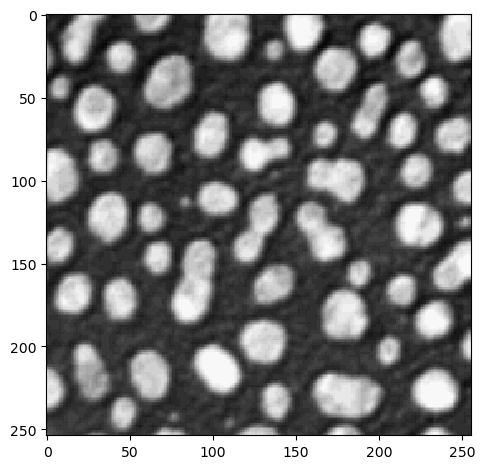

In [3]:
imshow(image)

## 读取元数据

在处理显微镜图像数据时，尊重图像数据的体素大小非常重要。特别是当需要以立方微米计算体积时，了解X、Y和Z方向上体素的大小是关键。

In [4]:
filename = "../../data/EM_C_6_c0.tif"

image_3d = imread(filename)
image_3d.shape

(256, 256, 256)

以下辅助函数是为ImageJ Tif图像编写的。它允许我们从TIF文件的元数据中读取体素大小。[源码](https://github.com/napari/napari/issues/5165#issuecomment-1268525176)。

In [5]:
def get_voxel_size_from_imagej_tiff(filename):
    """ Opens the metadata of a tiff file and returns the voxels size as (z,y,x)"""
    from PIL import Image
    from PIL.ExifTags import TAGS

    # format the meta data so that we can read it easily
    with Image.open(filename) as img:
        meta_dict = {}
        for key in img.tag.keys():
            if key in TAGS.keys():
                meta_dict[TAGS[key]] = img.tag[key]
                
    # read out voxel size from meta data
    z = [w[8:] for w in meta_dict['ImageDescription'][0].split("\n") if w.startswith('spacing')]
    x = 1/ (meta_dict["XResolution"][0][0]/meta_dict["XResolution"][0][1])
    y = 1/ (meta_dict["YResolution"][0][0]/meta_dict["YResolution"][0][1])

    return float(z[0]), float("%.4f" % y), float("%.4f" % x)

In [6]:
get_voxel_size_from_imagej_tiff(filename)

(0.16784672897196262, 0.1678, 0.1678)